In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N, D_in, H, D_out = 2, 100, 50, 1

In [3]:
x = np.random.randn(N, D_in)  # input 값
y = np.random.randn(N, D_out) # 정답

print(x.shape)
print(y.shape)
print(x) # 들어갈 데이터
print('====')
print(y) # 정답지

(2, 100)
(2, 1)
[[ 0.90560862  1.76183678 -0.64170876  0.6613074  -0.67441449 -0.17023158
   1.45289578  0.82926327 -1.31892661  0.41550149 -0.85099375  1.04442477
   1.47100352 -0.41478551  0.51227058  0.57733189 -0.1224727   0.39532291
  -0.63691037 -0.69500934  0.51010032 -0.11575434  2.02506695 -0.20780195
   0.45227127 -0.09262612  0.65200782  0.7284206   0.06343104  0.42830699
  -0.57876519  0.82027373 -1.50610758 -0.80623372 -0.09612447 -0.07959338
  -0.43268494  0.56319793  0.2294628   1.71222052 -1.09400314 -0.28347471
  -0.8530437   1.93244228 -0.43072901 -0.77372034 -0.43874472 -0.28583704
   1.57965553  0.46713707 -0.03678681 -1.91341371 -0.29334291 -0.19417983
   0.92914058 -1.25425286  0.33862185 -2.50865245 -0.77128711 -0.47803133
  -0.76791652  0.28928669  1.570542   -1.29861654 -0.65339707  0.73308145
  -0.07836432 -0.2422122   0.53561395 -1.55366282  0.59824131 -1.99612339
   2.68032559 -0.80687696 -0.79460154  0.00329492  1.03466556 -0.40108545
   0.37411219 -0.94909

In [4]:
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

print(w1.shape)
print(w2.shape)

(100, 50)
(50, 1)


In [8]:
y_pred_list = list()
loss_list = list()
learning_rate = 1e-6
for t in range(1000):
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)
    y_pred_list.append(y_pred[0][0])
    
    loss = np.square(y_pred - y).sum()
    loss_list.append(loss)
    print(t, loss)
    
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)
    
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 0.5430416458978028
1 0.5346990241861076
2 0.5264857169037195
3 0.5183996913939258
4 0.510438947637999
5 0.5026015177148665
6 0.4948854652698176
7 0.4872888849922038
8 0.47980990210285085
9 0.4724466718493723
10 0.46519737901098734
11 0.4580602374111672
12 0.4510334894392492
13 0.44411540557991663
14 0.43730428395096327
15 0.4305984498484481
16 0.42399625530063667
17 0.4174960786283857
18 0.41109632401414065
19 0.4047954210773006
20 0.3985918244577162
21 0.3924840134055975
22 0.3864704913788426
23 0.38054978564687986
24 0.37472044690164946
25 0.368981048874639
26 0.3633301879611116
27 0.3577664828500373
28 0.3522885741605851
29 0.34689512408506495
30 0.34158481603719126
31 0.3363563543069809
32 0.3312084637209918
33 0.326139889308809
34 0.32114939597450165
35 0.31623576817405197
36 0.31139780959812524
37 0.30663434286029745
38 0.3019442091899862
39 0.29732626813138086
40 0.2927793972465793
41 0.2883024918242943
42 0.2838944645932095
43 0.279554245439971
44 0.2752807811322354
45 0.2710

<function matplotlib.pyplot.show(close=None, block=None)>

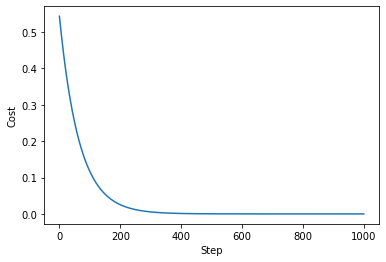

In [10]:
step_list = [i for i in range(len(loss_list))]
plt.plot(step_list, loss_list)
plt.ylabel('Cost')
plt.xlabel('Step')
plt.show